In [1]:
import pandas as pd

# Load the data
file_path = "../data/combined_mutation_CNV.csv"
data = pd.read_csv(file_path)

# Data pre-processing

In [2]:
import numpy as np

from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

In [3]:
# Load the data from the uploaded CSV file
file_path = "../data/combined_mutation_CNV.csv"
data = pd.read_csv(file_path)

# Separate the features and labels
labels = data["Subtype"].values
features = data.drop(columns=["Subtype", "Sample"]).values

# Convert to numpy arrays
labels = np.array(labels)
labels[labels=='PDM'] = 0
labels[labels=='SCM'] = 1

features = np.array(features)

# Output the results
print("Labels:", labels.shape)
print("Features:", features.shape)

Labels: (43,)
Features: (43, 656)


In [4]:
# Create a MinMaxScaler object with a feature range of -1 to 1
min_max_Scalar = preprocessing.MinMaxScaler(feature_range=(-1, 1))

# Fit the MinMaxScaler to the data (excluding the last column) and transform the data
# This scales the features to the specified range (-1 to 1)
features = min_max_Scalar.fit_transform(features)

# Convert the transformed data to a NumPy array
features = np.asarray(features)

# Encode labels if they are not integers 
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)

# PCA

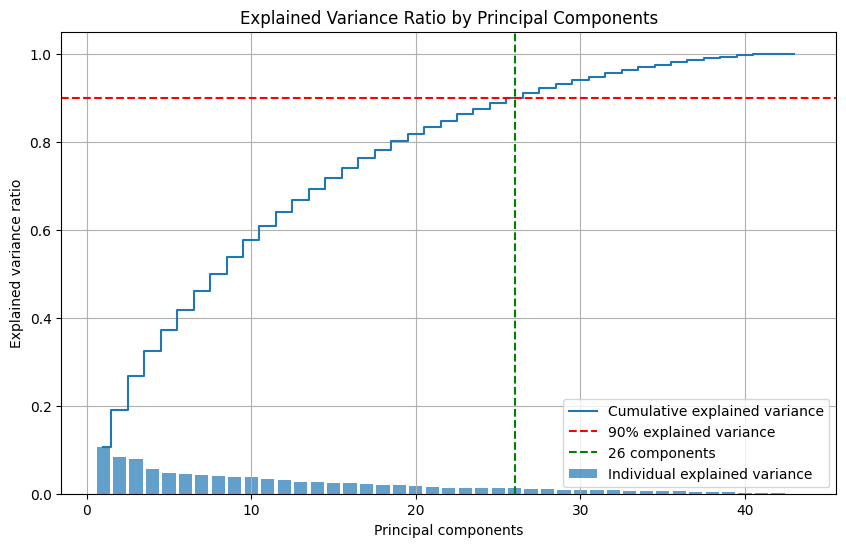

Number of components needed to explain 90% of the variance: 26


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


# Apply PCA
pca = PCA()
principal_components = pca.fit_transform(features)

# Calculate explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

# Find the number of components needed to explain 90% variance
n_components_90 = np.argmax(cumulative_explained_variance >= 0.90) + 1

# Plot explained variance ratio and cumulative explained variance
plt.figure(figsize=(10, 6))
plt.bar(
    range(1, len(explained_variance_ratio) + 1),
    explained_variance_ratio,
    alpha=0.7,
    align="center",
    label="Individual explained variance",
)
plt.step(
    range(1, len(cumulative_explained_variance) + 1),
    cumulative_explained_variance,
    where="mid",
    label="Cumulative explained variance",
)
plt.axhline(y=0.90, color="r", linestyle="--", label="90% explained variance")
plt.axvline(
    x=n_components_90, color="g", linestyle="--", label=f"{n_components_90} components"
)

plt.ylabel("Explained variance ratio")
plt.xlabel("Principal components")
plt.legend(loc="best")
plt.title("Explained Variance Ratio by Principal Components")
plt.grid()
plt.show()

# Print the number of components needed to explain 90% of the variance
print(f"Number of components needed to explain 90% of the variance: {n_components_90}")
